Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64,Float64,Float64,Int64
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-152.243,-161.874,4.0208e-37
2,140.151,4.0,-150.281,-159.898,2.90018e-36
3,140.302,4.0,-148.348,-157.951,2.03317e-35
4,140.452,4.0,-146.443,-156.032,1.38536e-34
5,140.603,4.0,-144.567,-154.142,9.17459e-34
6,140.754,4.0,-142.719,-152.28,5.9054e-33
7,140.905,4.0,-140.899,-150.446,3.69445e-32
8,141.055,4.0,-139.108,-148.641,2.2464e-31
9,141.206,4.0,-137.345,-146.864,1.32759e-30


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,150.402,7.8593,-69.3095,-78.0883,0.982072
2,146.784,12.8442,-73.8971,-82.9418,0.00766069
3,151.608,8.58291,-69.6752,-78.3726,0.73903
4,152.663,9.30653,-70.4557,-79.0848,0.362534
5,149.95,11.6382,-71.9073,-80.7175,0.0708397
6,149.648,8.82412,-69.7098,-78.5413,0.624323
7,151.156,8.0201,-69.3986,-78.126,0.945687
8,153.417,8.1809,-70.6479,-79.23,0.313553
9,151.608,8.0201,-69.5247,-78.2221,0.859076


### Snippet 4.23

Density of sigma

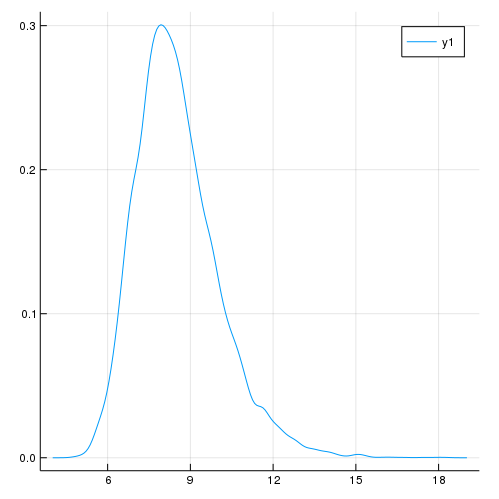

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*